# Basic description of the data sets

Data comes from [Bureau of Transportation Statistics (BTS)](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236). See [our data compiling](https://github.com/Morten-Esketveit/TSDS-gruppe-2019/blob/master/Exam/Data_compiling_v3.ipynb).

In [1]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import copy
import networkx as nx
import seaborn as sns
from scipy.stats import powerlaw

In [2]:
# Import data for each of the three years (1998, 2008, 2018)
FlightsNx98 = pd.read_pickle("Data/FlightsNx98.pkl")
FlightsNx08 = pd.read_pickle("Data/FlightsNx08.pkl")
FlightsNx18 = pd.read_pickle("Data/FlightsNx18.pkl")

In [3]:
# Show data-structure. The structure is similar across years.
FlightsNx18.head()

,Origin,Dest,Distance,count,avg_time_mins,companies,Origin_flights,Destination_flights,origin_degree,dest_degree,origin_btwns,dest_btwns,origin_clustcoef,dest_clustcoef
0,FLL,IAH,966.0,2096,161.333493,2,187977,342658,78.0,114.0,0.018337,0.038863,0.399600,0.247322
1,SEA,SFO,679.0,9186,127.618916,5,277642,346640,82.0,87.0,0.038347,0.028849,0.394460,0.335472
2,DCA,IAH,1208.0,2718,200.285501,3,263507,342658,88.0,114.0,0.011112,0.038863,0.352665,0.247322
3,LAX,ORD,1744.0,8257,240.317673,5,436008,737786,103.0,172.0,0.030602,0.141068,0.287455,0.138923
4,JAX,EWR,820.0,1008,141.658462,3,61453,284883,40.0,94.0,0.001380,0.012404,0.741026,0.332876


In [4]:
# Define networks for each year
net1998 = nx.from_pandas_edgelist(FlightsNx98, source = "Origin", target = "Dest", edge_attr = True)
net2008 = nx.from_pandas_edgelist(FlightsNx08, source = "Origin", target = "Dest", edge_attr = True)
net2018 = nx.from_pandas_edgelist(FlightsNx18, source = "Origin", target = "Dest", edge_attr = True)

In [5]:
# Basic information on each network: 
print(nx.info(net1998))
print(nx.info(net2008))
print(nx.info(net2018))

Name: 
Type: Graph
Number of nodes: 209
Number of edges: 1614
Average degree:  15.4450
Name: 
Type: Graph
Number of nodes: 304
Number of edges: 2754
Average degree:  18.1184
Name: 
Type: Graph
Number of nodes: 355
Number of edges: 3110
Average degree:  17.5211


In [11]:
# Further information on each network
# Certain measures not included for 1998 because graph is not connected
# 1998
print("------1998------")
print("Average Clustering Coefficient: {:.2f}".format(nx.average_clustering(net1998)))
print("Global Efficiency of network: {:.2f}".format(nx.global_efficiency(net1998)))
print("Maximum degree: {:.2f}".format(max(dict(net1998.degree()).values())))
print('Number of unique departure airports: {:.2f}'.format(FlightsNx98.Origin.nunique()))
print("Share of possible edges existing: {:.3f}".format(len(net1998.edges)/(len(net1998.nodes)*(len(net1998.nodes)-1)*(1/2))))

print("------2008------")
print("Average Clustering Coefficient: {:.2f}".format(nx.average_clustering(net2008)))
print("Global Efficiency of network: {:.2f}".format(nx.global_efficiency(net2008)))
print("Average shortest path length: {:.2f}".format(nx.average_shortest_path_length(net2008)))
print("Diameter: {:.2f}".format(nx.diameter(net2008)))
print("Maximum degree: {:.2f}".format(max(dict(net2008.degree()).values())))
print('Number of unique departure airports: {:.2f}'.format(FlightsNx08.Origin.nunique()))
print("Share of possible edges existing: {:.3f}".format(len(net2008.edges)/(len(net2008.nodes)*(len(net2008.nodes)-1)*(1/2))))

print("------2018------")
print("Average Clustering Coefficient: {:.2f}".format(nx.average_clustering(net2018)))
print("Global Efficiency of network: {:.2f}".format(nx.global_efficiency(net2018)))
print("Average shortest path length: {:.2f}".format(nx.average_shortest_path_length(net2018)))
print("Diameter: {:.2f}".format(nx.diameter(net2018)))
print("Maximum degree: {:.2f}".format(max(dict(net2018.degree()).values())))
print('Number of unique departure airports: {:.2f}'.format(FlightsNx18.Origin.nunique()))
print("Share of possible edges existing: {:.3f}".format(len(net2018.edges)/(len(net2018.nodes)*(len(net2018.nodes)-1)*(1/2))))

------1998------
Average Clustering Coefficient: 0.63
Global Efficiency of network: 0.45
Maximum degree: 99.00
Number of unique departure airports: 207.00
Share of possible edges existing: 0.074
------2008------
Average Clustering Coefficient: 0.65
Global Efficiency of network: 0.47
Average shortest path length: 2.33
Diameter: 5.00
Maximum degree: 172.00
Number of unique departure airports: 302.00
Share of possible edges existing: 0.060
------2018------
Average Clustering Coefficient: 0.57
Global Efficiency of network: 0.46
Average shortest path length: 2.39
Diameter: 6.00
Maximum degree: 172.00
Number of unique departure airports: 355.00
Share of possible edges existing: 0.049


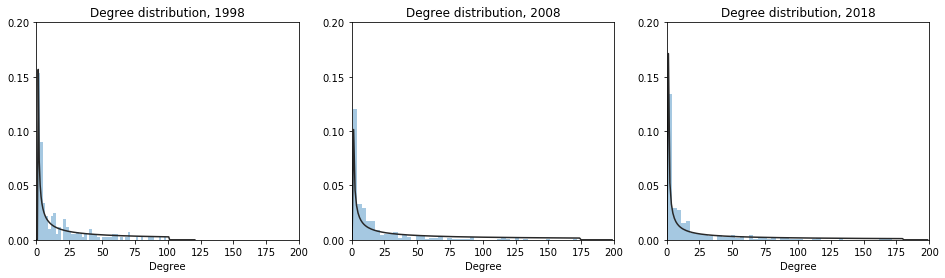

In [13]:
# Plotting degree distributions
fig, ax = plt.subplots(figsize = (16,4))

plt.subplot(131)
plt.title("Degree distribution, 1998")
sns.distplot(list(dict(net1998.degree).values()), bins = 50, kde = False, fit = powerlaw)
plt.xlabel("Degree")
plt.yticks([0, 0.05, 0.1, 0.15, 0.2])
plt.ylim(0,.2)
plt.xlim(0,200)

plt.subplot(132)
plt.title("Degree distribution, 2008")
sns.distplot(list(dict(net2008.degree).values()), bins = 50, kde = False, fit = powerlaw)
plt.xlabel("Degree")
plt.yticks([0, 0.05, 0.1, 0.15, 0.2])
plt.ylim(0,.2)
plt.xlim(0,200)

plt.subplot(133)
plt.title("Degree distribution, 2018")
sns.distplot(list(dict(net2018.degree).values()), bins = 50, kde = False, fit = powerlaw)
plt.xlabel("Degree")
plt.yticks([0, 0.05, 0.1, 0.15, 0.2])
plt.ylim(0,.2)
plt.xlim(0,200)

plt.savefig(fname = "Figures/degree_distributionv2.png", bbox_inches = "tight")
plt.show()

In [8]:
degrees = nx.degree_centrality(net2018)
degrees_df = pd.DataFrame(list(degrees.values()))
degrees_df.columns = ["degrees"]
degrees_df["airport"] = degrees.keys()

btwn = nx.betweenness_centrality(net2018)
betweenness = list(btwn.values())
btwn_df = pd.DataFrame(betweenness)
btwn_df.columns = ["betweenness"]
btwn_df["airport"] = btwn.keys()

node_char = degrees_df.merge(btwn_df, on= "airport")

clustr = nx.algorithms.cluster.clustering(net2018)
clustr_df = pd.DataFrame(list(clustr.values()))
clustr_df.columns = ["clustering"]
clustr_df["airport"] = clustr.keys()

node_char = node_char.merge(clustr_df, on = "airport")

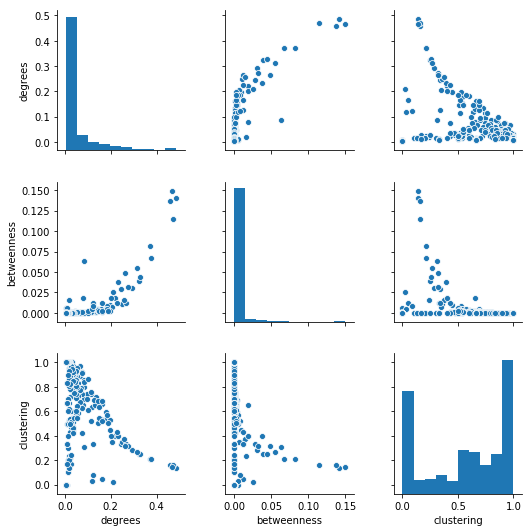

In [9]:
cols = ["degrees","betweenness","clustering"]
sns.pairplot(node_char[cols], height = 2.5)
plt.tight_layout()
plt.savefig(fname = "Figures/NxPairPlot.png")
plt.show()